In [ ]:
# run this cell to install pycaret in Google Colab
!pip install pycaret

In [ ]:
from pycaret.utils import version
version()

'3.3.2'

In [ ]:
import pandas as pd
from pycaret.classification import *
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path_bugzilla = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/bugzilla.csv'
path_columba = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/columba.csv'
#path_jdt = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/jdt.csv'
#path_mozilla = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/mozilla.csv'
#path_platform = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/platform.csv'
path_postgres = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/postgres.csv'

#df_test = pd.read_csv(path_bugzilla)
df_train = pd.read_csv(path_columba)
#df_test = pd.read_csv(path_jdt)
#df_test = pd.read_csv(path_mozilla)
#df_test = pd.read_csv(path_platform)
df_test = pd.read_csv(path_postgres)

In [ ]:
df_train.head()

,transactionid,commitdate,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,1,2006/7/8 9:06,1,2,2,0.954434,0.102564,0.102564,39.0,0,1,53,1.0,21140,8343.008333,1188,0
1,6,2006/5/28 22:53,1,3,3,0.693298,0.333333,0.091503,102.0,0,6,24,1.0,70,70.000000,70,0
2,10,2006/5/4 11:48,1,1,1,0.000000,0.097345,0.044248,113.0,1,3,41,1.0,2402,713.716667,2396,0
3,28,2005/9/27 11:09,1,3,4,0.894836,0.035484,0.034409,232.5,0,8,97,1.0,16307,5914.816667,15716,0
4,41,2005/1/24 11:41,1,1,1,0.000000,0.103234,0.004975,804.0,0,4,8,1.0,1778,712.283333,1774,1


In [ ]:
df_test.head()

,transactionid,commitdate,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,6,2004/12/31 16:58,10,107,694,0.999731,0.006990,0.006990,284.461095,0,20,70706,0.195965,1603,988.733333,1594,0
1,7,2004/8/29 0:12,10,111,755,0.999520,0.006866,0.006866,288.600000,0,20,108260,0.286093,25822,4918.773409,25556,0
2,13,2000/1/26 11:09,1,1,1,0.000000,0.025641,0.029915,234.000000,0,2,0,1.000000,13150,5202.438095,510,1
3,38,2004/4/19 20:33,2,2,8,0.861654,6.000000,6.000000,0.000000,0,7,1230,0.500000,909,874.948718,107,0
4,49,2002/8/30 9:06,1,1,1,0.000000,0.000000,0.000000,0.000000,0,3,298,1.000000,5076,521.867108,468,0


In [ ]:

train_features = df_train.drop(columns='bug').columns.tolist()
test_features = df_test.drop(columns='bug', errors='ignore').columns.tolist()

# 2. Cek apakah keduanya sama
if train_features == test_features:
    print("✅ Fitur training dan testing SAMA.")
else:
    print("❌ Fitur TIDAK sama!")

    # Tampilkan perbedaannya
    missing_in_test = set(train_features) - set(test_features)
    missing_in_train = set(test_features) - set(train_features)

    if missing_in_test:
        print("🔻 Fitur yang ADA di training TAPI TIDAK ada di testing:")
        print(missing_in_test)

    if missing_in_train:
        print("🔺 Fitur yang ADA di testing TAPI TIDAK ada di training:")
        print(missing_in_train)


✅ Fitur training dan testing SAMA.


In [ ]:

df_test.drop(['transactionid', 'commitdate'], axis=1, inplace=True)

In [ ]:
# 2. Load Model Terbaik dari Google Drive
model_path = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/Cross Project Defect Prediction/Model/columba_best_model'
loaded_model = load_model(model_path)

Transformation Pipeline and Model Successfully Loaded


In [ ]:
# 3. Prediksi model
predictions = predict_model(loaded_model, data=df_test)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


In [ ]:
print(predictions.columns)

Index(['ns', 'nm', 'nf', 'entropy', 'la', 'ld', 'lt', 'fix', 'ndev', 'pd',
       'npt', 'exp', 'rexp', 'sexp', 'bug', 'prediction_label',
       'prediction_score'],
      dtype='object')


In [ ]:
# Evaluasi jika ada kolom 'bug'
if 'bug' in df_test.columns:
    y_true = df_test['bug']
    y_pred = predictions['prediction_label']

    print("✅ Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n✅ Classification Report:\n", classification_report(y_true, y_pred))
else:
    print("✅ Prediksi (tanpa label):")
    print(predictions[['prediction_label', 'prediction_score']].head())

✅ Confusion Matrix:
 [[14314   998]
 [ 3518  1601]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86     15312
           1       0.62      0.31      0.41      5119

    accuracy                           0.78     20431
   macro avg       0.71      0.62      0.64     20431
weighted avg       0.76      0.78      0.75     20431



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

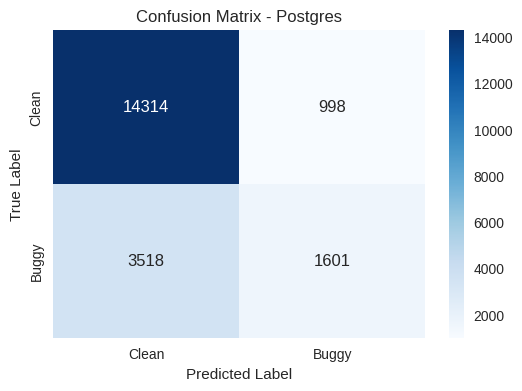

In [ ]:
# Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clean', 'Buggy'],
            yticklabels=['Clean', 'Buggy'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Postgres')
plt.show()


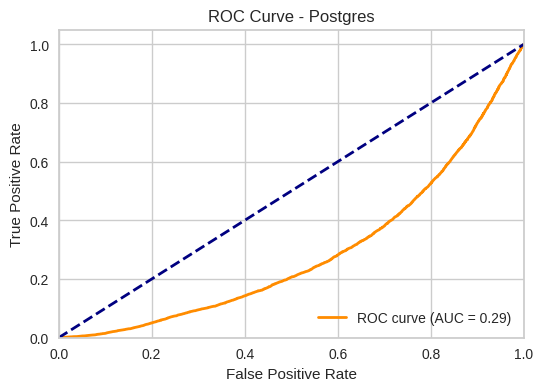

In [ ]:
# Pastikan y_true hanya 0/1 dan prediction_score tersedia
if 'prediction_score' in predictions.columns:
    y_score = predictions['prediction_score']

    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Postgres')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
else:
    print("❌ prediction_score tidak tersedia, ROC curve tidak bisa ditampilkan.")
